[View in Colaboratory](https://colab.research.google.com/github/FelipeRocha/istanbul/blob/master/main.ipynb)

In [104]:
!git clone https://github.com/FelipeRocha/istanbul.git
!pip install shapely


fatal: destination path 'istanbul' already exists and is not an empty directory.


### Imports

In [0]:
import sys
sys.path.insert(0, '/content/istanbul')
from datetime import datetime       #datetime
from datetime import timedelta
from collections import Counter
import operator
#%matplotlib inline
import matplotlib.pylab as plt      # biblioteca do matlab
import matplotlib.dates as ndates   # dates matplotlib
import pandas as pd                 # biblioteca pandas
import numpy as np
import foursq as fsq
import seaborn as sns;
from shapely.geometry import Point
from shapely.geometry import Polygon
import json
from math import radians, cos, sin, asin, sqrt
from scipy.stats import norm

### Reading Data

In [106]:
#@title PATH { form-width: "400px" }
FILE_PATH = "/content/istanbul/Istanbul" #@param {type:"string"}
FILE_GEOJSON = FILE_PATH +".geojson"
FILE = FILE_PATH + "0"
temp0 = pd.read_table(FILE, header=None, parse_dates = {'datetime': [5]}, index_col = ['datetime']) #reading temp0 from file
temp0 = pd.DataFrame(temp0 \
        .rename(
            columns={
                0: 'user', 
                1: 'venue', 
                2: 'lat', 
                3: 'lng', 
                4: 'category', 
                6: 'offset'
            }
        ))


catList = []
catSet     = set()

print temp0

                       user                     venue        lat        lng  \
datetime                                                                      
2012-04-03 18:00:07  190571  4b4b87b5f964a5204a9f26e3  41.029717  28.974420   
2012-04-03 18:00:23    2703  4e210d0162e1964dbb63b74d  41.003742  29.034721   
2012-04-03 18:00:34  118211  4c063c0a517d0f47c59df515  41.059768  29.037131   
2012-04-03 18:00:40  217966  4e6b8c68b993d5439fd2d48c  41.037310  28.932255   
2012-04-03 18:00:49   89149  4c344a2f66e40f47b045c98b  41.026357  29.117310   
2012-04-03 18:00:49   97573  4de2349952b1d38d2967f16f  40.947766  29.107063   
2012-04-03 18:00:54   60759  4b883f90f964a5204fea31e3  41.043520  29.004310   
2012-04-03 18:00:59   89150  4dd80343b0fb8af38094fa48  40.999000  28.798461   
2012-04-03 18:01:04   23604  4f55e513e4b01eb412c0c11c  40.993608  28.902068   
2012-04-03 18:01:12  119520  4b69657df964a520f4a02be3  41.078154  29.011116   
2012-04-03 18:01:23   38440  4d8cd84cd265236aea5de41

In [107]:
FILE = FILE_PATH + "1"
print FILE
temp1 = pd.read_table(FILE,header=None, parse_dates = {'datetime': [5]}, index_col = ['datetime']) #reading temp1 from file
temp1 = pd.DataFrame(temp1 \
        .rename(
            columns={
                0: 'user', 
                1: 'venue', 
                2: 'lat', 
                3: 'lng', 
                4: 'category', 
                6: 'offset'
            }
        ))
catList = []
catSet     = set()
print temp1

/content/istanbul/Istanbul1
                       user                     venue        lat        lng  \
datetime                                                                      
2012-11-23 17:44:11   88526  4bc601fcf360ef3bdaf8da2d  41.080826  29.030539   
2012-11-23 17:44:15   14322  4b50966af964a520632827e3  41.034078  28.978972   
2012-11-23 17:44:16   34062  4cfaa3e4ee9cb60c018d8bad  41.077216  29.043367   
2012-11-23 17:44:20   25833  4b758d05f964a5208e132ee3  40.960335  29.080842   
2012-11-23 17:44:26   92179  505f53d3e4b043282fa76196  40.993684  29.023338   
2012-11-23 17:44:27  256196  4b815a37f964a52007a130e3  41.039161  28.994358   
2012-11-23 17:44:30  161103  4eef5610be7b6d6202a9cd10  41.068060  28.992641   
2012-11-23 17:44:31  124493  509ba48fe4b0c3ba38b7d55c  40.998531  28.886011   
2012-11-23 17:44:33   79615  4b6849fef964a520c36f2be3  41.052140  29.010215   
2012-11-23 17:44:34   92279  4d8cf60d5091a1cde3d06c01  41.004951  28.867944   
2012-11-23 17:44:35   74

In [108]:
FILE = FILE_PATH + "2"
temp2 = pd.read_table(FILE,header=None, parse_dates = {'datetime': [5]}, index_col = ['datetime']) #reading temp2 from file
temp2 = pd.DataFrame(temp2 \
        .rename(
            columns={
                0: 'user', 
                1: 'venue', 
                2: 'lat', 
                3: 'lng', 
                4: 'category', 
                6: 'offset'
            }
        ))
catList = []
catSet     = set()
print temp2

                       user                     venue        lat        lng  \
datetime                                                                      
2013-03-26 17:28:31  235526  4b444826f964a52070f325e3  40.985711  29.099707   
2013-03-26 17:28:32   37883  4c753ab51b30a09309afee09  40.958901  29.101582   
2013-03-26 17:28:37    3990  5151dab7e4b022391e3af28e  41.041164  28.993615   
2013-03-26 17:28:39  120705  4b69625ef964a520a9a02be3  40.987689  29.036865   
2013-03-26 17:28:48  236132  4b69625ef964a520a9a02be3  40.987689  29.036865   
2013-03-26 17:29:03   41820  4fd8ef2fe4b022c15da955e3  40.990974  29.075084   
2013-03-26 17:29:09   71195  4d932d9a9213b1f7ceddc146  40.998766  28.858807   
2013-03-26 17:29:13  103753  4bb5b72e46d4a593a145c5c0  41.048956  28.992400   
2013-03-26 17:29:14  243769  4b69625ef964a520a9a02be3  40.987689  29.036865   
2013-03-26 17:29:23  199932  4c681902e75ac9280bc0fbda  40.960109  29.082250   
2013-03-26 17:29:26   10709  4c0d1bfc336220a1a531ca7

In [109]:
frames = [temp0, temp1, temp2]
data = pd.concat(frames)
#print data
data.info()
print data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2984592 entries, 2012-04-03 18:00:07 to 2013-09-16 23:24:15
Data columns (total 6 columns):
user        int64
venue       object
lat         float64
lng         float64
category    object
offset      int64
dtypes: float64(2), int64(2), object(2)
memory usage: 159.4+ MB
                       user                     venue        lat        lng  \
datetime                                                                      
2012-04-03 18:00:07  190571  4b4b87b5f964a5204a9f26e3  41.029717  28.974420   
2012-04-03 18:00:23    2703  4e210d0162e1964dbb63b74d  41.003742  29.034721   
2012-04-03 18:00:34  118211  4c063c0a517d0f47c59df515  41.059768  29.037131   
2012-04-03 18:00:40  217966  4e6b8c68b993d5439fd2d48c  41.037310  28.932255   
2012-04-03 18:00:49   89149  4c344a2f66e40f47b045c98b  41.026357  29.117310   
2012-04-03 18:00:49   97573  4de2349952b1d38d2967f16f  40.947766  29.107063   
2012-04-03 18:00:54   60759  4b883f90f964a520

### Filters

In [0]:
#@title Data Range { vertical-output: true, form-width: "400px", display-mode: "both" }
SET_DATA_RANGE = False #@param {type:"boolean"}

start_vector = 0 #@param {type:"integer"}
end_vector = 10000 #@param {type:"integer"}

if SET_DATA_RANGE:
  data = data[start_vector:end_vector]




In [0]:
#@title Day { vertical-output: true, form-width: "400px", display-mode: "both" }

SET_DATE = True #@param {type:"boolean"}

start_day = 0 #@param {type:"slider", min:0, max:6, step:1}
end_day = 4 #@param {type:"slider", min:0, max:6, step:1}



In [0]:
#@title Hour { vertical-output: true, form-width: "400px", display-mode: "both" }
SET_HOUR = False #@param {type:"boolean"}

start_hour = 0 #@param {type:"slider", min:0, max:23, step: 1}
end_hour = 13 #@param {type:"slider", min:0, max:23, step:1}




---



In [0]:
start = datetime.now()
#print "Started at: "+ str(start)

### Functions

In [0]:
def haversine(lon1, lat1, lon2, lat2):
    """w
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return float(c * r)

def loadGeoPolygons(geodata, verbose=True):
    '''
        Adds the shapely Polygons object to the GeoJSON
        read from file. Polygons are objects from shapely
        module which we can use to determine if a point is
        within or not.
    '''
    polys = 0
    geoPolygons = list()
    for f in geodata['features']:
        t = f['geometry']['type']
        try:
            name = f['properties']['NAME_2']
        except KeyError:
            name = f['properties']['NAME_1']
        if verbose:
            if verbose:
                print 'Loading:', name, t
        for c in f['geometry']['coordinates']:
            if t == 'MultiPolygon':
                for cc in c:
                    if verbose:
                        polys += 1
                        if verbose:
                            print 'Polygon #' + str(polys) + ':', len(cc), 'coords'
                    poly = Polygon(cc) # Shapely Polygon for future tests of coordinates.
                    geoPolygons.append(dict(name=name, polygon=poly))
            elif t == 'Polygon':
                if verbose:
                    polys += 1
                    if verbose:
                        print 'Polygon #' + str(polys) + ':', len(c), 'coords'
                poly = Polygon(c)
                geoPolygons.append(dict(name=name, polygon=poly))
            else:
                print ERROR + 'Unrecognized Type: ' + t + RESET
                print c
                return
    return geoPolygons

def loadNeighbourhoodSamples(dataset,
                             inputfilename=FILE_GEOJSON):
    '''
        Adds the correspondent neighbourhood name to the dataset samples
    '''
    inputfile = open(inputfilename, 'r')
    geoNeighbourBounds = json.load(inputfile)
    neighbourPolygons = loadGeoPolygons(geoNeighbourBounds, verbose=False)
    reg = list()
    # for index in xrange(len(dataset)):
        # sample = dataset[index]
        # lng, lat = sample[2]
    t = 0
    i = 0
    for r in dataset.itertuples():
        i = i + 1
        lng = r.lng
        lat = r.lat
        #print lng
        #print lat
        p = Point(lng, lat) # creation of a shapely Point for testing
        region = None
        for pg in neighbourPolygons:
            #print pg
            #print pg['polygon'].contains(p)
            if pg['polygon'].contains(p): # test if Point is inside the shapely Polygon
                #if pg['name'] != sample[-1]:
                region = pg['name'].encode("utf-8")
                #print region
                #t = t+1
                #print t
                #print float(t)/float(i)*100
                break
        reg.append(region)
        #print len(reg)
    return reg

sns.set(color_codes=True)

def rank(N, P):
  fx = 1-(float(P)/(N-1))
  return "{0:.1f}".format(fx)

### Main Code

In [0]:
data = data.reset_index()

data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.dayofweek

tempdf = data.groupby(['user'])['hour'].agg('count').rename("count").reset_index()
tempdf
db = pd.merge(tempdf, data, on=['user'], how='inner')


In [116]:
data = db[db['count'] >= 20]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2893481 entries, 30 to 2984591
Data columns (total 10 columns):
user        int64
count       int64
datetime    datetime64[ns]
venue       object
lat         float64
lng         float64
category    object
offset      int64
hour        int64
day         int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 242.8+ MB


In [117]:


if SET_DATE:
  data = data[((data['day'] >=int(start_day)) & (data['day'] <= int(end_day) ))]
  print "Day range has been changed... \nstart_day:\t" + str(start_day) + "\nend_day:\t" + str(end_day)
  
if SET_HOUR:
  data = data[((data['hour'] >=start_hour) & (data['hour'] <= end_hour ))]
  print "Hour range has been changed... \nstart_hour:\t" + str(start_hour) + "\nend_hour:\t" + str(end_hour)


tmpdata = data[['lat','lng']]
tmpdata = tmpdata.drop_duplicates(['lat','lng'],keep='first')
#i = 0
#for v in tmpdata.itertuples():
#   i = i+1
#    print i;
tmpdata['region'] = loadNeighbourhoodSamples(dataset=tmpdata)




data = pd.merge(data, tmpdata[['lat','lng','region']], on = ['lat','lng'], how = 'inner')


  

#print data
#print "############################CAT##############################"
for cat in data['category']:
    no_cat = True
    for m_cat, s_cat in fsq.foursquare_cat.items():
        if cat in s_cat:
            #print m_cat
            no_cat = False
            catList.append(m_cat.encode("utf-8"))
    if no_cat:
        print "Não há categoria principal para " + cat
        catList.append("none")
        catSet.add(cat.encode("utf-8"))

data['main'] = pd.Series(catList, index=data.index)

#================================SHIFT====================================#
data = data.sort_values(['datetime'])
data = data.drop_duplicates(keep='first')
data['lat2']        = pd.DataFrame(data.groupby(['user'])['lat'].shift(-1))
data['lng2']        = pd.DataFrame(data.groupby(['user'])['lng'].shift(-1))
data['mainto']      = pd.DataFrame(data.groupby(['user'])['main'].shift(-1))
data['venueto']     = pd.DataFrame(data.groupby(['user'])['venue'].shift(-1))
data['regionto']    = pd.DataFrame(data.groupby(['user'])['region'].shift(-1))
data['datetimeto']  = pd.DataFrame(data.groupby(['user'])['datetime'].shift(-1))
data = data.dropna(axis=0, how='any')
data = data[(data['venue'] != data['venueto'])]

print "printing data..."
print data.sort_values(['datetime','user'])

data['diff']    = data['datetimeto'] - data['datetime']
data['dist']    = data.apply(lambda x: haversine(x['lng'],x['lat'],x['lng2'],x['lat2']), axis=1)
td              = timedelta(days=1).total_seconds()
data            = data[data['diff'].dt.total_seconds() <= td]
#==========================================================================#

print "users :"+ str(len(data['user'].unique()))
print "venuess :"+ str(len(data['venue'].unique()))
#print STOP
#===============================SPLIT=DATA=================================#
N         = int(data['venue'].size/5)
print "N: "+ str(N)
remainder = data['venue'].size % 5.0
END       = (N*5) + (int(remainder*data['venue'].size))

train     = []
test      = []
train.append(data[0:5])
test.append(data[N*5:END])
data = data.sort_values(['datetime'])
#data = data.reindex()
nu = 0
for n in xrange(1,N):
    nu = n*5
    if n%2 == 0:
        train.append(data[nu:nu+5])
        #print "datan"
        #print data[nu:nu+5]
    else:
        test.append(data[nu:nu+5])

data  = pd.concat(train)
#data = t1
data2 = pd.concat(test)
#data2 = t2
print data.info()
print data2.info()

print data.sort_values(['datetime','user'])
print data['diff'].mean()
#data = data[((data['dist'] <= 2) | (data['regionto'] == data['region']))]
#==========================================================================#


Day range has been changed... 
start_day:	0
end_day:	4
printing data...
           user  count            datetime                     venue  \
516793   190571     80 2012-04-03 18:00:07  4b4b87b5f964a5204a9f26e3   
1709600  118211     94 2012-04-03 18:00:34  4c063c0a517d0f47c59df515   
1335816   89149    157 2012-04-03 18:00:49  4c344a2f66e40f47b045c98b   
1663682   97573    142 2012-04-03 18:00:49  4de2349952b1d38d2967f16f   
1599818   89150     49 2012-04-03 18:00:59  4dd80343b0fb8af38094fa48   
1820596   23604    220 2012-04-03 18:01:04  4f55e513e4b01eb412c0c11c   
829943   119520    135 2012-04-03 18:01:12  4b69657df964a520f4a02be3   
1674510   38440    165 2012-04-03 18:01:23  4d8cd84cd265236aea5de416   
602751    19117    341 2012-04-03 18:01:24  4c9f478619e4236aab515789   
955122    64054    179 2012-04-03 18:01:36  4f7b3aebe4b02f1b2d2abb80   
519497    97573    142 2012-04-03 18:01:54  4b95e3fbf964a520ecb634e3   
1198154   27940    304 2012-04-03 18:01:58  4f538858e4b0b5893938

           user  count            datetime                     venue  \
516793   190571     80 2012-04-03 18:00:07  4b4b87b5f964a5204a9f26e3   
1335816   89149    157 2012-04-03 18:00:49  4c344a2f66e40f47b045c98b   
1663682   97573    142 2012-04-03 18:00:49  4de2349952b1d38d2967f16f   
1674510   38440    165 2012-04-03 18:01:23  4d8cd84cd265236aea5de416   
1198154   27940    304 2012-04-03 18:01:58  4f538858e4b0b58939380f56   
7349     109686    145 2012-04-03 18:03:11  4cb9b97a0180721e3cb89561   
295062    20204    299 2012-04-03 18:03:29  4d57ae2e92326ea8bfd65ec0   
1888122  212107     86 2012-04-03 18:03:41  4ed7d11e93adde11f979a1e0   
227092    47121    225 2012-04-03 18:04:01  4ce3bb2e1594236a4bc4f849   
257324   106154    139 2012-04-03 18:04:06  4cd103d96449a0936af0cdcf   
597769    19709    319 2012-04-03 18:05:23  4b718d38f964a520ee4c2de3   
1291972   79160    154 2012-04-03 18:05:28  4d048d3130a58cfa137ba0e7   
442198    51591    213 2012-04-03 18:05:38  4b444826f964a52070f3

In [0]:
#data = datatempo
#data.info()

In [0]:
data = data[(data['dist']<=20)]

In [0]:
data = data[(data['lat2'] <= 41.15)]
data = data[(data['lng'] <= 29.1)]
data.info()

In [120]:


dF = pd.DataFrame(data.groupby(['datetime','main','region','venue','user','lat','lng'])['offset']\
                .agg('count')\
                .rename("count")\
                .reset_index())
#print dF
#dF = pd.DataFrame(data.groupby([pd.Grouper(freq='H'),'main','venue','user'])['offset']\
                # .agg('count')\
                # .rename("count")\
                # .reset_index())

dF['sum'] = dF.groupby(['datetime','main','venue'])['count'].transform('sum')
#data = dF[((dF['count'] >= 1))]
dF = dF[((dF['count'] >= 1))]
#data = data.reset_index()

dF['hour']  = dF['datetime'].dt.hour
dF['sumMain'] = dF.groupby(['hour','main'])['count'].transform('sum')

for x in dF.main.unique():
    dF[x] = np.where(dF['main']==x,dF['sumMain'],0)

cate = list(data['main'].unique())
cate.append('hour')
ndf = dF[cate]
ndf = ndf.drop_duplicates(cate,keep='first')
print ndf
cate.remove('hour')
ndf = ndf.groupby('hour').sum()
#ndf = ndf.sort_values('hour', ascending=True)
print ndf
ndf = ndf.T
#print STOP
#b = sns.clustermap(ndf,metric='correlation',row_cluster=True,col_cluster=False,z_score=1)
#plt.show(b)

#print STOP
#print ndf


#==================================GMM=====================================#
prop       = data.groupby(['venue']).size().reset_index(name="count")
prop['sum']= prop['count'].agg('sum')
prop['Q']  = prop['count']/prop['sum']*100
#print prop
propmain            = data.groupby(['main']).size().reset_index(name="countmain")
propmain['summain'] = propmain['countmain'].agg('sum')
propmain['Qmain']   = propmain['countmain']/propmain['summain']*100
#print propmain

occur       = data.groupby(['venue','venueto']).size().reset_index(name="occur")
occurmain   = data.groupby(['main','mainto']).size().reset_index(name="occurmain")

gmm         = pd.merge(data, prop[['venue','count','Q','sum']], on = ['venue'], how = 'inner')
#print gmm
gmm         = pd.merge(gmm, propmain[['main','countmain','Qmain','summain']], on = ['main'], how = 'inner')
#print gmm
gmm         = pd.merge(gmm, occur[['venue','venueto','occur']], on = ['venue','venueto'], how = 'inner')
#print gmm
gmm         = pd.merge(gmm, occurmain[['main','mainto','occurmain']], on = ['main','mainto'], how = 'inner')

print gmm
#==========================================================================#

#==================================PMM=====================================#
prop       = data.groupby(['user','venue']).size().reset_index(name="count")
prop['sum']= prop['count'].agg('sum')
prop['Q']  = prop['count']/prop['sum']*100

propmain            = data.groupby(['user','main']).size().reset_index(name="countmain")
propmain['summain'] = propmain['countmain'].agg('sum')
propmain['Qmain']   = propmain['countmain']/propmain['summain']*100

occur       = data.groupby(['user','venue','venueto']).size().reset_index(name="occur")
occurmain   = data.groupby(['user','main','mainto']).size().reset_index(name="occurmain")

pmm         = pd.merge(data, prop[['user','venue','count','Q','sum']], on = ['user','venue'], how = 'inner')
pmm         = pd.merge(pmm, propmain[['user','main','countmain','Qmain','summain']], on = ['user','main'], how = 'inner')
pmm         = pd.merge(pmm, occur[['user','venue','venueto','occur']], on = ['user','venue','venueto'], how = 'inner')
pmm         = pd.merge(pmm, occurmain[['user','main','mainto','occurmain']], on = ['user','main','mainto'], how = 'inner')

print pmm
#==========================================================================#


        Outdoors & Recreation  Professional & Other Places  Food  Residence  \
0                        6034                            0     0          0   
1                           0                            0  8219          0   
2                           0                          873     0          0   
4                           0                            0     0       3990   
7                           0                            0     0          0   
10                          0                            0     0          0   
11                          0                            0     0          0   
16                          0                            0     0          0   
109                         0                            0  6361          0   
110                         0                            0     0       3456   
112                      4767                            0     0          0   
113                         0                       

          user  count_x            datetime                     venue  \
0       190571       80 2012-04-03 18:00:07  4b4b87b5f964a5204a9f26e3   
1       190571       80 2012-04-19 15:22:26  4efed5ae2c5b66f33b5308a2   
2        89149      157 2012-04-03 18:00:49  4c344a2f66e40f47b045c98b   
3        89149      157 2012-05-29 15:49:41  4c344a2f66e40f47b045c98b   
4        89149      157 2012-05-11 09:37:01  4c344a2f66e40f47b045c98b   
5        89149      157 2012-04-09 18:05:25  4c344a2f66e40f47b045c98b   
6        89149      157 2012-04-25 16:15:28  4c344a2f66e40f47b045c98b   
7        89149      157 2013-02-11 19:14:13  4c344a2f66e40f47b045c98b   
8        89149      157 2012-05-09 07:12:35  4c344a2f66e40f47b045c98b   
9        89149      157 2012-05-03 13:13:52  4d1dd8b6b69c6dcb5f085795   
10       97573      142 2012-04-03 18:00:49  4de2349952b1d38d2967f16f   
11       97573      142 2012-06-04 07:57:53  4bf91115b182c9b66560785a   
12       97573      142 2012-06-04 13:30:24  4dfdc7

In [0]:

#==========================================================================#
gcat = dict()
for row in gmm[['main','mainto','Qmain','occurmain']].drop_duplicates(keep='first').itertuples():
    main    = row.main
    mainto  = row.mainto
    Qmain   = row.Qmain
    Pmain   = row.occurmain

    try:
        gcat[main][mainto]   = Pmain
    except KeyError:
        gcat[main]           = dict()
        gcat[main][mainto]   = Pmain
#==========================================================================#

#==========================================================================#
g = dict()
for row in gmm[['venue','venueto','Q','occur']].drop_duplicates(keep='first').itertuples():
    venue    = row.venue
    venueto  = row.venueto
    Q        = row.Q
    P        = row.occur

    try:
        g[venue][venueto]   = P
    except KeyError:
        g[venue]            = dict()
        g[venue][venueto]   = P
#==========================================================================#

#==========================================================================#
pcat = dict()
for row in pmm[['user','main','mainto','Qmain','occurmain']].drop_duplicates(keep='first').itertuples():
    main    = row.main
    mainto  = row.mainto
    Qmain   = row.Qmain
    Pmain   = row.occurmain
    user    = row.user
    if user in pcat.keys():

        try:
            pcat[user][main][mainto]   = Pmain
        except KeyError:
            pcat[user][main]           = dict()
            pcat[user][main][mainto]   = Pmain
    else:
        pcat[user]                 = dict()
        pcat[user][main]           = dict()
        pcat[user][main][mainto]   = Pmain
#print pcat
#==========================================================================#

#==========================================================================#
p = dict()
for row in pmm[['user','venue','venueto','Q','occur']].drop_duplicates(keep='first').itertuples():
    venue   = row.venue
    venueto = row.venueto
    Q       = row.Q
    P       = row.occur
    user    = row.user
    if user in p.keys():

        try:
            p[user][venue][venueto] = P
        except KeyError:
            p[user][venue]          = dict()
            p[user][venue][venueto] = P
    else:
        p[user]                 = dict()
        p[user][venue]          = dict()
        p[user][venue][venueto] = P
#print p
#==========================================================================#

#==========================================================================#
cat_dict = dict(zip(data['venueto'], data['mainto']))
cat_dict.update(dict(zip(data['venue'], data['main'])))
#print cat_dict
#==========================================================================#


In [0]:

#==========================================================================#
# friends         = dict()
friendship_meet = data[['datetime','venue','venueto','user']].groupby([pd.Grouper(key='datetime',freq='H'),'venue'],as_index=False)
z = dict()
for name, group in friendship_meet:
    dt      = name[0]
    venue   = name[1]
    #venueto = group['venueto']
    tmp     = 0
    #print dt

    #print name
    #print group
    for user in group['user'].unique():
        gr = group[group['user']==user]
        for item in gr.itertuples(): 
            venueto = item.venueto
            try:
                tmp = tmp + p[user][venue][venueto]
            except KeyError:
                continue

    for user in group['user'].unique():
        gr = group[group['user']==user]
        for item in gr.itertuples(): 
            venueto = item.venueto
            if len(group['user'].unique()) > 1:
                if user in z.keys():
                    try:
                        z[user][venue][venueto] = tmp
                    except KeyError:
                        z[user][venue]          = dict()
                        z[user][venue][venueto] = tmp
                else:
                    z[user]                 = dict()
                    z[user][venue]          = dict()
                    z[user][venue][venueto] = tmp
            else:
                if user in z.keys():
                    try:
                        z[user][venue][venueto] = tmp + g[venue][venueto]
                    except KeyError:
                        z[user][venue]          = dict()
                        z[user][venue][venueto] = tmp + g[venue][venueto]
                else:
                    z[user]                 = dict()
                    z[user][venue]          = dict()
                    z[user][venue][venueto] = tmp + g[venue][venueto]

#         if dt in friends.keys():
#             try:
#                 friends[dt][venue].add(user)
#             except KeyError:
#                 friends[dt][venue] = set()
#                 friends[dt][venue].add(user)
#         else:
#             friends[dt] = dict()
#             friends[dt][venue] = set()
#             friends[dt][venue].add(user)

# print friends
#print z
#==========================================================================#


### Accuracy

---


In [0]:


# #===============================ACCURACY===================================#
# totalmain   = 0
# accmain     = 0
# for row in data2.itertuples():
#     main    = row.main
#     mainto  = row.mainto
#     user    = row.user
#     try:
#         A = pcat[user][main]
#         topmain = dict(Counter(A).most_common(5))
#         print totalmain
#         totalmain = totalmain + 1
#     except KeyError:
#         continue
#     if mainto in topmain.keys():
#         accmain = accmain + 1

# print "PMMcat"
# accmain = float(accmain)/float(totalmain)
# print accmain*100
# #==========================================================================#


# #===============================ACCURACY===================================#
# totalmain   = 0
# accmain     = 0
# for row in data2.itertuples():
#     main    = row.main
#     mainto  = row.mainto
#     try:
#         A = gcat[main]
#         topmain = dict(Counter(A).most_common(5))
#         totalmain = totalmain + 1
#         print totalmain
#     except KeyError:
#         continue
#     if mainto in topmain.keys():
#         accmain = accmain + 1

# print "GMMcat"
# accmain = float(accmain)/float(totalmain)
# print accmain*100
# print totalmain
# #==========================================================================#
res = list()
resdict = dict()
#===============================ACCURACY===================================#
for nu in xrange(2,12,2):
    resdict[nu] = list() 
    totalvenue   = 0
    accvenue     = 0
    for row in data2.itertuples():
        venue   = row.venue
        venueto = row.venueto
        user    = row.user
        try:
            A = p[user][venue]
            mostcommon = Counter(A).most_common(nu)
            topvenue = dict(mostcommon)
            #print topvenue
            PO = [pos for pos,pair in enumerate(mostcommon) if pair[0] == venueto]
            #print res[(nu/2)-1] = 
            #print venueto
            if PO:
              #print PO[0]
              resdict[nu].append(rank(nu,PO[0]))
            totalvenue = totalvenue + 1
            #print totalvenue
        except KeyError:
            continue
        if venueto in topvenue.keys():
            accvenue = accvenue + 1

In [124]:
print nu
print "PMM:"
accvenue = float(accvenue)/float(totalvenue)
print accvenue*100
print totalvenue
#==========================================================================#
#print resdict

10
PMM:
30.7605302448
243133


In [125]:

 #===============================ACCURACY===================================#
# totalvenue   = 0
# accvenue     = 0
# for row in data2.itertuples():
#     venue   = row.venue
#     venueto = row.venueto
#     user    = row.user
#     try:
#         A = z[user][venue]
#         topvenue = dict(Counter(A).most_common(10))
#         totalvenue = totalvenue + 1
#         #print totalvenue
#     except KeyError:
#         continue
#     if venueto in topvenue.keys():
#         accvenue = accvenue + 1
# print "PMMZ:"
# accvenue = float(accvenue)/float(totalvenue)
# print accvenue*100
# print totalvenue
# #==========================================================================#
#rank =1 - (P/(N-1))
#===============================ACCURACY===================================#
for nu in xrange(2,12,2):
    totalvenue   = 0
    accvenue     = 0
    totalmain    = 0
    accmain      = 0
    for row in data2.itertuples():
        venue   = row.venue
        venueto = row.venueto
        user    = row.user
        main    = row.main
        mainto  = row.mainto
        totalmain = totalmain + 1
        try:
            topvenue    = dict()
            catD        = dict()
            Acat = pcat[user][main]
            top3gcat = dict(Counter(Acat).most_common(2))
            #A = p[user][venue]
            # topvenue = dict(Counter(A).most_common(10))
            #for k,v in p[user][venue].iteritems():
            #c = cat_dict[venue]
            if mainto in top3gcat.keys():
                accmain = accmain + 1
        except KeyError:
            continue
        try:
            A = p[user][venue]
            totalvenue = totalvenue + 1
        except KeyError:
            continue
        try:
            for k,v in p[user][venue].iteritems():
                c = cat_dict[k]
                try:
                    catD[c][k] = v
                except KeyError:
                    catD[c] = dict()
                    catD[c][k] = v
                n = nu/2
                for ktegory in catD.keys():
                    topvenue.update(dict(Counter(catD[ktegory]).most_common(n)))
                    #print topvenue
                
        except KeyError:
            continue
        if venueto in topvenue.keys():
            accvenue = accvenue + 1
    print nu
    print "PMMPandCAT:"
    accvenue = float(accvenue)/float(totalvenue)
    print accvenue*100
    print totalvenue
    print (float(accmain)/float(totalmain))*100
    print totalmain

2
PMMPandCAT:
27.5935393386
243133
45.838150061
506914
4
PMMPandCAT:
30.2188514105
243133
45.838150061
506914
6
PMMPandCAT:
30.7847967985
243133
45.838150061
506914
8
PMMPandCAT:
30.9443802363
243133
45.838150061
506914
10
PMMPandCAT:
30.9937359388
243133
45.838150061
506914


### *Execution time*

In [126]:
end = datetime.now()
print "Started at:\t" + str(start)
print "Finished at:\t" + str(end)
print "\nTime: " + str(end-start)

Started at:	2018-04-11 22:53:17.280834
Finished at:	2018-04-11 23:47:00.079404

Time: 0:53:42.798570


In [127]:
data.groupby(['user'])['dist'].count().max()

436

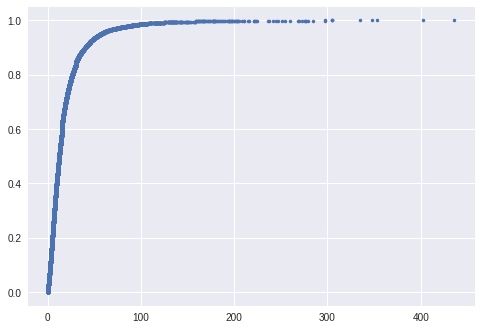

499358
333793


In [128]:
newdf = data.groupby(['user'])['hour'].agg('count').rename("count").reset_index() 
x = np.sort(newdf['count'])
y = np.arange(1,len(x)+1) / float(len(x))
_ = plt.plot(x,y,marker='.',linestyle='none')
plt.show()
np.sort(newdf['count'])
print newdf['count'].sum()
print newdf[(newdf['count'] >= 20)]['count'].sum()

{8: ['0.4', '1.0', '0.9', '1.0', '1.0', '1.0', '1.0', '1.0', '0.7', '1.0', '1.0', '1.0', '0.7', '1.0', '0.9', '0.9', '1.0', '0.9', '1.0', '0.9', '0.3', '0.7', '1.0', '1.0', '1.0', '1.0', '0.7', '1.0', '0.9', '1.0', '0.6', '0.7', '0.6', '1.0', '1.0', '1.0', '1.0', '0.9', '1.0', '1.0', '0.9', '1.0', '1.0', '1.0', '0.9', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.9', '0.6', '1.0', '0.9', '1.0', '0.9', '0.9', '1.0', '0.9', '1.0', '0.6', '0.7', '1.0', '0.7', '1.0', '1.0', '0.4', '0.4', '1.0', '1.0', '1.0', '1.0', '0.7', '1.0', '0.9', '1.0', '1.0', '0.9', '0.9', '1.0', '0.4', '1.0', '0.9', '1.0', '0.9', '1.0', '1.0', '0.9', '0.6', '0.9', '1.0', '1.0', '1.0', '0.9', '0.9', '0.6', '0.9', '1.0', '1.0', '1.0', '0.7', '1.0', '0.9', '1.0', '1.0', '1.0', '0.6', '1.0', '0.9', '1.0', '0.4', '0.9', '1.0', '1.0', '0.9', '1.0', '1.0', '1.0', '1.0', '0.9', '0.9', '1.0', '1.0', '1.0', '1.0', '1.0', '0.9', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.6', '1.0', '0.7', '1.0', '0.9', '

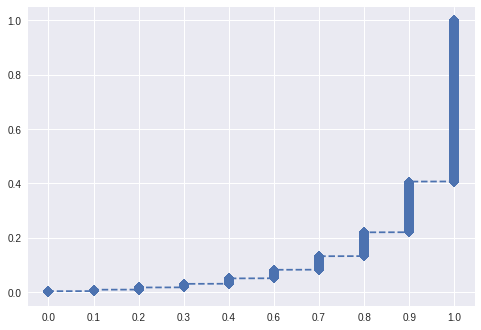

In [129]:
print resdict
x = np.sort(resdict[10])
y = np.arange(1,len(x)+1) / float(len(x))
_ = plt.plot(x,y,marker='D',linestyle='--')
plt.show()